In [1]:
from astropy.io import fits
import os,glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyaxehelper.pyaxehelper import *

cwd = os.getcwd()

In [2]:
FILES = glob.glob('OUTPUT_G141_F160W/*2_opt.SPC.fits')
FILES2 = glob.glob('OUTPUT_G141_F160W/*2.SPC.fits')


In [3]:
ID = 74
WMIN = 11500.
WMAX = 16000.
DW = 50.


In [4]:
wgrid,dataframe = calculate_median(FILES,ID,WMIN,WMAX,DW)
wgrid2,dataframe2 = calculate_median(FILES2,ID,WMIN,WMAX,DW)

In [5]:
STANDFILE = '/Users/kbhirombhakdi/_work/_calib_files/PYSYN_CDBS/calspec/gd153_mod_010.fits'


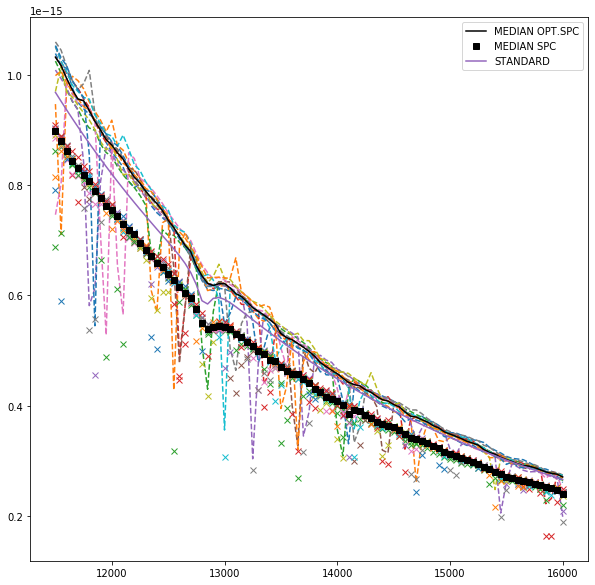

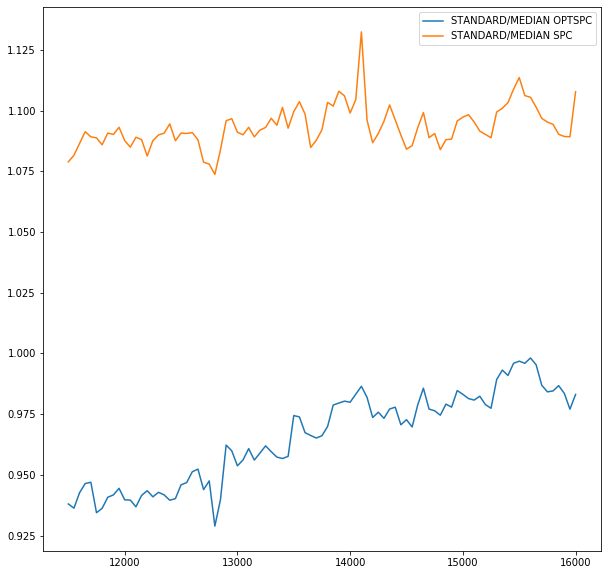

In [6]:
plt.figure(figsize=(10,10))
for i in dataframe.columns:
    if i=='MEDIAN':
        plt.plot(wgrid,dataframe[i],'k-',label='MEDIAN OPT.SPC')
    else:
        plt.plot(wgrid,dataframe[i],'--')
        
for i in dataframe2.columns:
    if i=='MEDIAN':
        plt.plot(wgrid2,dataframe2[i],'ks',label='MEDIAN SPC')
    else:
        plt.plot(wgrid2,dataframe2[i],'x')
        
x = fits.open(STANDFILE)
x2 = pd.DataFrame(x[1].data)
w,f = x2['WAVELENGTH'],x2['FLUX']
mod = interp1d(w.values,f.values,kind='linear',bounds_error=False,fill_value=np.nan)
f2 = mod(wgrid)
plt.plot(wgrid,f2,label='STANDARD')

plt.legend()
    
plt.figure(figsize=(10,10))
plt.plot(wgrid,f2/dataframe['MEDIAN'],label='STANDARD/MEDIAN OPTSPC')
plt.plot(wgrid,f2/dataframe2['MEDIAN'],label='STANDARD/MEDIAN SPC')
plt.legend()